# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
renda = pd.read_csv(r'C:\Users\Gabriel\Documents\Data Science\Data Science EBAC\Módulo 10\Exércicios\Atividade 1\previsao_de_renda.csv')

In [3]:
renda.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [4]:
renda.isnull().sum()

Unnamed: 0                  0
data_ref                    0
index                       0
sexo                        0
posse_de_veiculo            0
posse_de_imovel             0
qtd_filhos                  0
tipo_renda                  0
educacao                    0
estado_civil                0
tipo_residencia             0
idade                       0
tempo_emprego            2534
qt_pessoas_residencia       0
mau                         0
renda                       0
dtype: int64

In [5]:
renda.shape

(15000, 16)

In [6]:
renda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   index                  15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12466 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  mau                    15000 non-null  bool   
 15  re

1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

In [7]:
tab = pd.crosstab(renda['data_ref'] , renda['tipo_renda'])
freq = tab.div(tab.sum(axis = 1) , axis = 0)

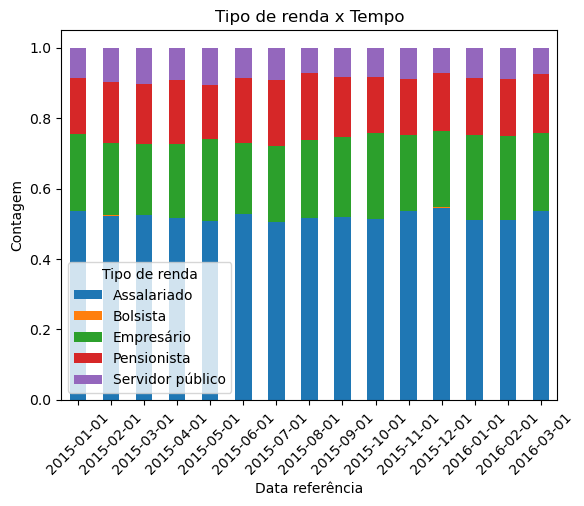

In [8]:
ax = freq.plot.bar(stacked = True)
ax.set_title('Tipo de renda x Tempo')
plt.xticks(rotation=45)
plt.xlabel('Data referência')
plt.ylabel('Contagem')
plt.legend(title = 'Tipo de renda')


plt.show()

Não houve mudanças consideráveis do tipo de renda em relação ao tempo.

In [9]:
tab2 = pd.crosstab(renda['data_ref'] , renda['educacao'])
tab2 = tab2.div(tab2.sum(axis = 1) , axis = 0)

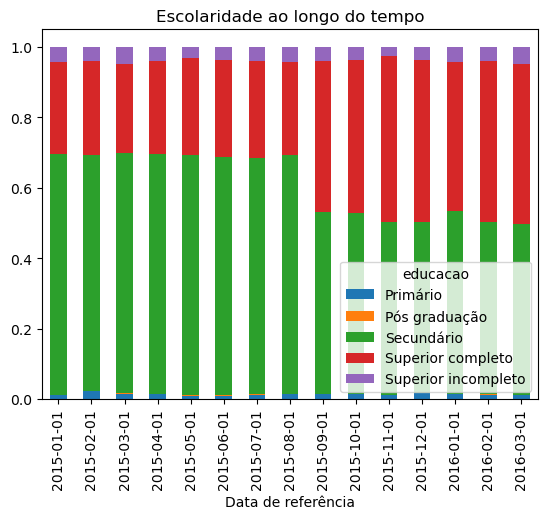

In [73]:
ax = tab2.plot.bar(stacked = True)
ax.set_title('Escolaridade ao longo do tempo')
ax.set_xlabel('Data de referência')

plt.show()

A partir do final do terceiro trimestre de 2015, o número de clientes com ensino superior completo aumentou consideravelmente, talvez seja algo a ser investigado mais profundamente.

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

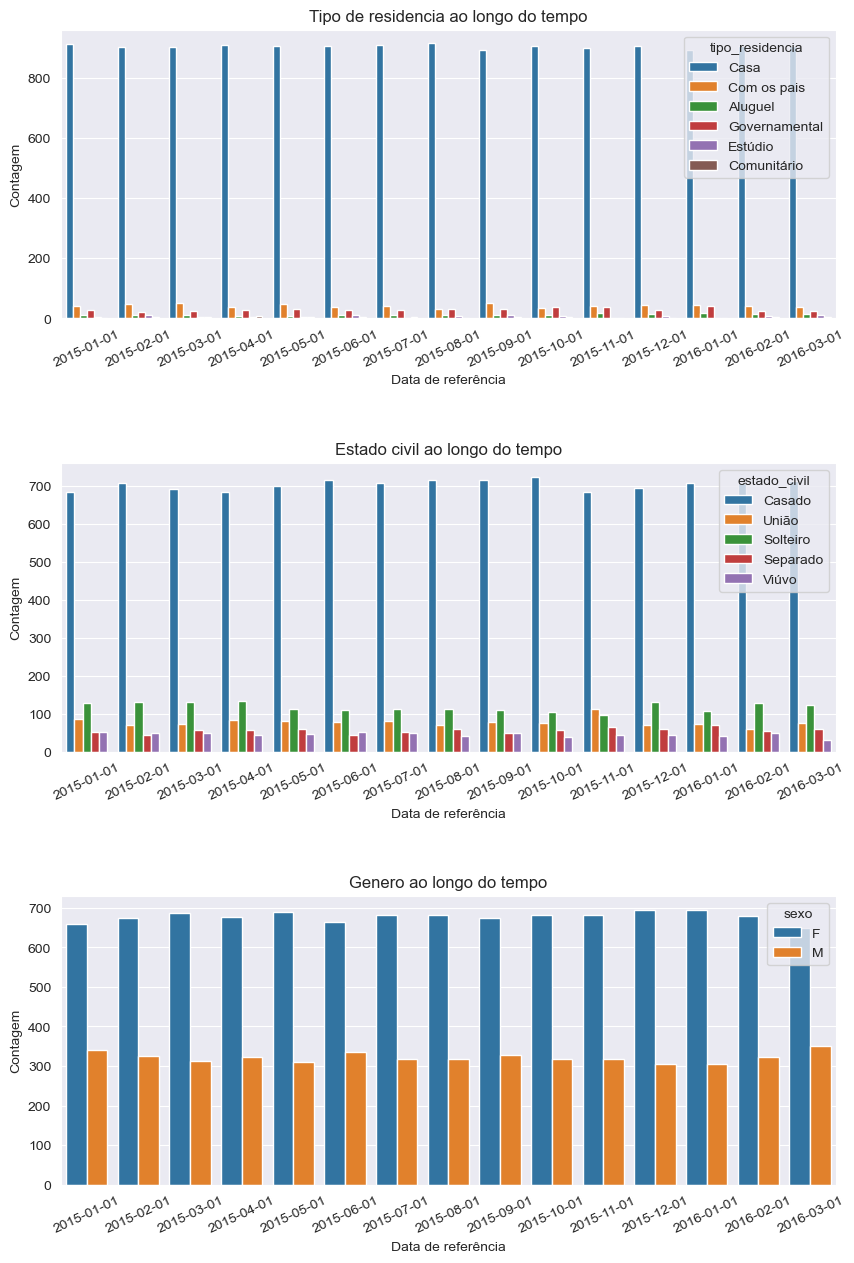

In [115]:
fig , ax = plt.subplots(3 , 1 , figsize = (10 , 15)) #Criando figura com 3 gráficos.

sns.set_style('darkgrid')

sns.countplot(x = 'data_ref' , hue = 'tipo_residencia' , data = renda , ax = ax[0]) #Gráfico 1
ax[0].set_title('Tipo de residência ao longo do tempo')
ax[0].tick_params(axis='x', rotation=25)
ax[0].set_title('Tipo de residencia ao longo do tempo')
ax[0].set_ylabel('Contagem')
ax[0].set_xlabel('Data de referência')

sns.countplot(x = 'data_ref' , hue = 'estado_civil' , data = renda , ax = ax[1])#Gráfico 2
ax[1].set_title('Estado civil ao longo do tempo')
ax[1].tick_params(axis = 'x' , rotation = 25)
ax[1].set_xlabel('Data de referência')
ax[1].set_ylabel('Contagem')


sns.countplot(x = 'data_ref' , hue = 'sexo' , data = renda , ax = ax[2])#Gráfico 3
ax[2].tick_params(axis = 'x' , rotation = 25)
ax[2].set_title('Genero ao longo do tempo')
ax[2].set_xlabel('Data de referência')
ax[2].set_ylabel('Contagem')

plt.subplots_adjust(hspace=0.5)#Aumentando espaçamento entre os gráficos




plt.show()

Ambos os gráficos acima demonstram uma consistência ao longo do tempo. Destaco particularmente o mês de novembro de 2015 para a análise do estado cívil ao longo do tempo, onde a união estável apresentou um aumento significativo em comparação aos outros meses. No entanto, é importante notar que esse aumento foi seguido por uma volta ao padrão no mês seguinte, em dezembro. Esses padrões consistentes são indicativos de que essas variáveis são confiáveis e podem ser utilizadas com segurança em processos de modelagem e análise de dados.